In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')

In [57]:
df18 = pd.read_csv('data/2018ind.csv')
df18.Date = pd.to_datetime(df18.Date,format = '%d/%m/%Y') 
df19 = pd.read_csv('data/2019ind.csv')
df19.Date = pd.to_datetime(df19.Date,format = '%d/%m/%Y')
df18.head()


,Date,Country,City,Specie,count,min,max,median,variance
0,2018-01-01,IN,Bengaluru,co,74,1.8,34.4,9.4,309.57
1,2018-01-02,IN,Bengaluru,co,113,0.2,23.9,9.6,238.96
2,2018-01-03,IN,Bengaluru,co,110,0.4,27.7,11.4,349.97
3,2018-01-04,IN,Bengaluru,co,117,0.2,22.1,10.0,264.71
4,2018-01-05,IN,Bengaluru,co,117,0.2,26.1,10.5,220.48


In [58]:
print(df18.Specie.unique())
print(df18.City.unique())

['co' 'humidity' 'no2' 'o3' 'pm10' 'pm25' 'pressure' 'so2' 'temperature'
 'wd' 'wind-gust' 'wind-speed']
['Bengaluru' 'Bhopal' 'Chandigarh' 'Chennai' 'Delhi' 'Gandhinagar'
 'Hyderabad' 'Jaipur' 'Kolkata' 'Lucknow' 'Mumbai' 'Nagpur' 'Nashik'
 'Patna' 'Thiruvananthapuram' 'Visakhapatnam' 'New Delhi']


In [59]:
city = ['Bengaluru','Chennai','Delhi','Hyderabad','Kolkata','Mumbai']
df18 = df18[df18.City.isin(city)]
df19 = df19[df19.City.isin(city)]

In [60]:
df18=df18.loc[(df18!=0).any(1)]

In [61]:
df18temp = df18[df18.Specie == 'temperature']
df19temp = df19[df19.Specie == 'temperature']
df18temp

,Date,Country,City,Specie,count,min,max,median,variance
14802,2018-04-15,IN,Bengaluru,temperature,47,22.0,32.5,27.5,132.14
14803,2018-04-16,IN,Bengaluru,temperature,48,23.5,33.0,26.0,114.57
14804,2018-04-17,IN,Bengaluru,temperature,48,22.5,34.0,26.5,156.34
14805,2018-04-18,IN,Bengaluru,temperature,48,21.5,34.0,28.0,183.17
14806,2018-04-19,IN,Bengaluru,temperature,47,23.0,34.0,28.5,145.01
...,...,...,...,...,...,...,...,...,...
15153,2018-06-27,IN,Mumbai,temperature,38,28.0,32.6,30.0,16.94
15154,2018-06-28,IN,Mumbai,temperature,48,25.6,29.6,27.0,14.29
15155,2018-06-29,IN,Mumbai,temperature,47,26.0,30.1,28.1,15.71
15156,2018-06-30,IN,Mumbai,temperature,48,26.0,31.6,27.5,34.95


In [67]:
df18pm25 = df18[df18.Specie == 'pm25']
df19pm25 = df19[df19.Specie == 'pm25']
df19pm10 = df19[df19.Specie == 'pm10']
df18temp

,Date,Country,City,Specie,count,min,max,median,variance
14802,2018-04-15,IN,Bengaluru,temperature,47,22.0,32.5,27.5,132.14
14803,2018-04-16,IN,Bengaluru,temperature,48,23.5,33.0,26.0,114.57
14804,2018-04-17,IN,Bengaluru,temperature,48,22.5,34.0,26.5,156.34
14805,2018-04-18,IN,Bengaluru,temperature,48,21.5,34.0,28.0,183.17
14806,2018-04-19,IN,Bengaluru,temperature,47,23.0,34.0,28.5,145.01
...,...,...,...,...,...,...,...,...,...
15153,2018-06-27,IN,Mumbai,temperature,38,28.0,32.6,30.0,16.94
15154,2018-06-28,IN,Mumbai,temperature,48,25.6,29.6,27.0,14.29
15155,2018-06-29,IN,Mumbai,temperature,47,26.0,30.1,28.1,15.71
15156,2018-06-30,IN,Mumbai,temperature,48,26.0,31.6,27.5,34.95


In [68]:
df18temp25=df18temp.merge(df18pm25,on=['City','Date','Country'])
df19temp25=df19temp.merge(df19pm25,on=['City','Date','Country'])
df19temp10=df19temp.merge(df19pm10,on=['City','Date','Country'])
df19temp25

,Date,Country,City,Specie_x,count_x,min_x,max_x,median_x,variance_x,Specie_y,count_y,min_y,max_y,median_y,variance_y
0,2018-12-31,IN,Bengaluru,temperature,227,15.0,30.3,23.8,159.00,pm25,179,2.0,834.0,148.0,70686.50
1,2019-01-01,IN,Bengaluru,temperature,233,12.5,30.6,24.1,234.25,pm25,186,41.0,251.0,153.0,11163.00
2,2019-01-02,IN,Bengaluru,temperature,226,11.0,35.2,24.2,280.11,pm25,185,3.0,186.0,112.0,14720.70
3,2019-01-03,IN,Bengaluru,temperature,227,9.5,31.1,24.1,285.21,pm25,201,38.0,178.0,129.0,13795.50
4,2019-01-04,IN,Bengaluru,temperature,218,8.5,37.7,24.3,344.59,pm25,188,35.0,188.0,123.0,12160.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2321,2019-12-28,IN,Mumbai,temperature,357,21.6,36.8,27.0,79.10,pm25,309,53.0,234.0,162.0,3508.27
2322,2019-12-29,IN,Mumbai,temperature,20,24.0,28.8,26.0,11.31,pm25,294,65.0,191.0,161.0,3177.26
2323,2020-01-03,IN,Mumbai,temperature,194,21.0,33.2,25.0,35.81,pm25,286,88.0,800.0,170.0,16796.20
2324,2020-01-04,IN,Mumbai,temperature,360,18.3,32.4,23.0,51.78,pm25,288,68.0,810.0,169.0,29774.40


Text(0, 0.5, 'pm25')

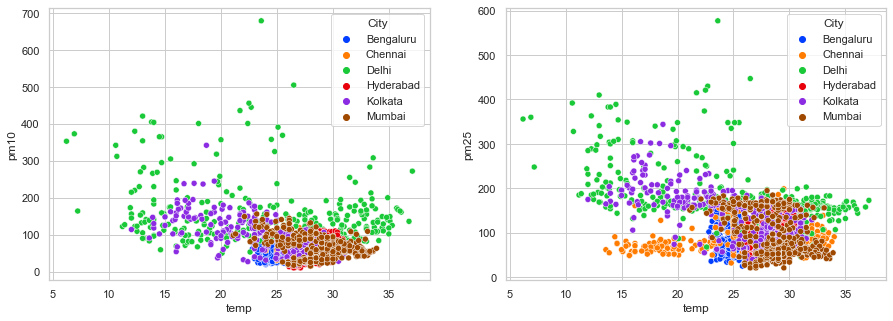

In [70]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5)) 
sns.scatterplot(df19temp10['median_x'],df19temp10['median_y'],hue=df19temp10.City,ax=ax1)
ax1.set_xlabel('temp')
ax1.set_ylabel('pm10')
sns.scatterplot(df19temp25['median_x'],df19temp25['median_y'],hue=df19temp25.City,ax=ax2)
ax2.set_xlabel('temp')
ax2.set_ylabel('pm25')

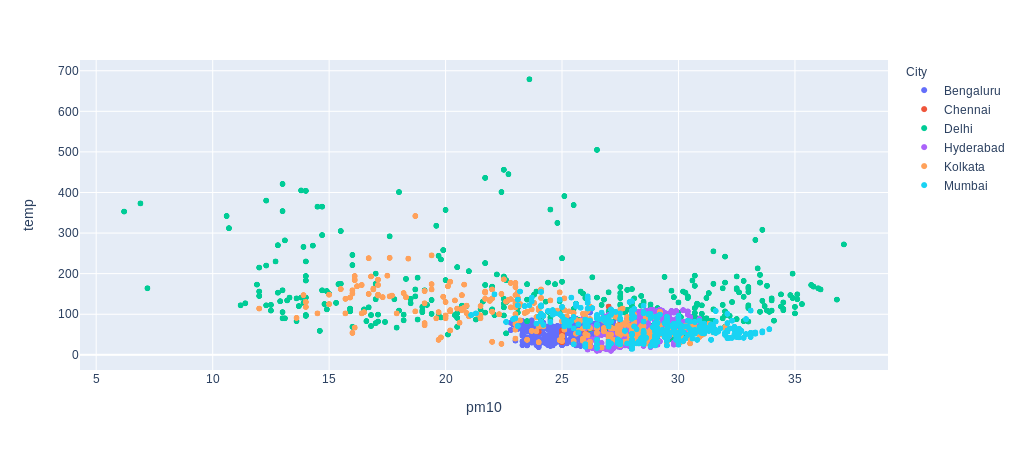

In [80]:
fig=px.scatter(df19temp10,'median_x','median_y',color='City')
fig.update_layout(yaxis=dict(title='temp'),
                  xaxis=dict(title='pm10'))


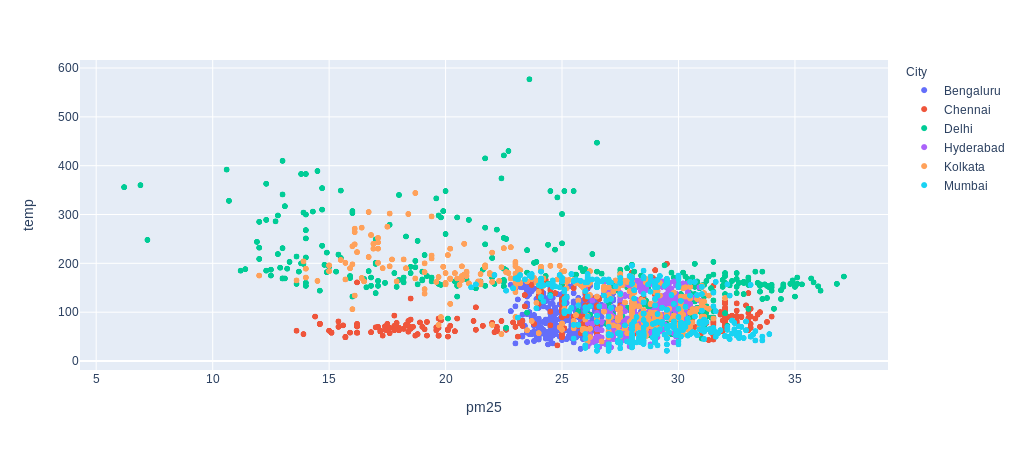

In [81]:
fig=px.scatter(df19temp25,'median_x','median_y',color='City')
fig.update_layout(yaxis=dict(title='temp'),
                  xaxis=dict(title='pm25'))

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'